In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data - Copy.csv')

In [36]:
df

,Employee ID,Gender,Education Level,Department,Job Title,Organization Level,Region,Country,Employment Status,Employment Type,...,Salary Band,Performance Rating,Projects Handled,Project Target,Team Size,Satisfaction Score,Incentive Amount ($) Band,Bonus ($) Band,Working Hours Band,Overtime Band
0,1001,Female,Associate's,IT,IT Support Specialist,Entry,Asia,Bangladesh,Remote,Full-time,...,75K-100K,2,32,33,15,2,5K-10K,5K-10K,1901-2100,151-200
1,1002,Male,Associate's,IT,Software Engineer,Operational,North America,USA,Remote,Part-time,...,125K-150K,2,40,46,9,3,500-5K,5K-10K,1701-1900,Above 200
2,1003,Female,Bachelor's,R&D,Research Scientist,Mid-Level,Europe,Germany,Onsite,Full-time,...,50K-75K,2,63,73,11,4,5K-10K,10K-20K,1701-1900,101-150
3,1004,Female,Master's,Sales,Sales Representative,Entry,Europe,UK,Onsite,Full-time,...,75K-100K,2,32,35,11,3,500-5K,500-5K,1701-1900,0-50
4,1005,Female,Doctorate,IT,IT Support Specialist,Entry,Asia,Bangladesh,Remote,Full-time,...,125K-150K,2,53,62,13,3,5K-10K,5K-10K,1901-2100,101-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2796,Female,High School,Marketing,Marketing Coordinator,Entry,Europe,Germany,Onsite,Full-time,...,50K-75K,2,53,61,7,4,5K-10K,10K-20K,1701-1900,101-150
1796,2797,Male,Associate's,Sales,Sales Representative,Entry,Europe,UK,Remote,Full-time,...,75K-100K,2,20,27,14,4,500-5K,500-5K,1501-1700,51-100
1797,2798,Female,Master's,Finance,Financial Analyst,Operational,Asia,India,Remote,Full-time,...,75K-100K,1,57,67,12,2,500-5K,5K-10K,1701-1900,101-150
1798,2799,Other,Associate's,Sales,Account Executive,Operational,Europe,UK,Onsite,Full-time,...,100K-125K,3,30,37,12,4,5K-10K,5K-10K,1901-2100,Above 200


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee ID                1800 non-null   int64 
 1   Gender                     1800 non-null   object
 2   Education Level            1800 non-null   object
 3   Department                 1800 non-null   object
 4   Job Title                  1800 non-null   object
 5   Organization Level         1800 non-null   object
 6   Region                     1800 non-null   object
 7   Country                    1800 non-null   object
 8   Employment Status          1800 non-null   object
 9   Employment Type            1800 non-null   object
 10  Times Promoted             1800 non-null   int64 
 11  Current Employment Status  1800 non-null   object
 12  Ethnicity                  1800 non-null   object
 13  Tenure (Years)             1800 non-null   int64 
 14  Age (Yea

In [38]:
df.drop(['Employee ID'], axis=1, inplace=True)

In [39]:
df

,Gender,Education Level,Department,Job Title,Organization Level,Region,Country,Employment Status,Employment Type,Times Promoted,...,Salary Band,Performance Rating,Projects Handled,Project Target,Team Size,Satisfaction Score,Incentive Amount ($) Band,Bonus ($) Band,Working Hours Band,Overtime Band
0,Female,Associate's,IT,IT Support Specialist,Entry,Asia,Bangladesh,Remote,Full-time,3,...,75K-100K,2,32,33,15,2,5K-10K,5K-10K,1901-2100,151-200
1,Male,Associate's,IT,Software Engineer,Operational,North America,USA,Remote,Part-time,4,...,125K-150K,2,40,46,9,3,500-5K,5K-10K,1701-1900,Above 200
2,Female,Bachelor's,R&D,Research Scientist,Mid-Level,Europe,Germany,Onsite,Full-time,1,...,50K-75K,2,63,73,11,4,5K-10K,10K-20K,1701-1900,101-150
3,Female,Master's,Sales,Sales Representative,Entry,Europe,UK,Onsite,Full-time,2,...,75K-100K,2,32,35,11,3,500-5K,500-5K,1701-1900,0-50
4,Female,Doctorate,IT,IT Support Specialist,Entry,Asia,Bangladesh,Remote,Full-time,3,...,125K-150K,2,53,62,13,3,5K-10K,5K-10K,1901-2100,101-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Female,High School,Marketing,Marketing Coordinator,Entry,Europe,Germany,Onsite,Full-time,1,...,50K-75K,2,53,61,7,4,5K-10K,10K-20K,1701-1900,101-150
1796,Male,Associate's,Sales,Sales Representative,Entry,Europe,UK,Remote,Full-time,1,...,75K-100K,2,20,27,14,4,500-5K,500-5K,1501-1700,51-100
1797,Female,Master's,Finance,Financial Analyst,Operational,Asia,India,Remote,Full-time,0,...,75K-100K,1,57,67,12,2,500-5K,5K-10K,1701-1900,101-150
1798,Other,Associate's,Sales,Account Executive,Operational,Europe,UK,Onsite,Full-time,1,...,100K-125K,3,30,37,12,4,5K-10K,5K-10K,1901-2100,Above 200


In [40]:
le= LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df['Education Level']= le.fit_transform(df['Education Level'])
df['Department']= le.fit_transform(df['Department'])
df['Job Title']= le.fit_transform(df['Job Title'])
df['Organization Level']= le.fit_transform(df['Organization Level'])
df['Region']= le.fit_transform(df['Region'])
df['Country']= le.fit_transform(df['Country'])
df['Employment Status']= le.fit_transform(df['Employment Status'])
df['Employment Type']= le.fit_transform(df['Employment Type'])
df['Current Employment Status']= le.fit_transform(df['Current Employment Status'])
df['Ethnicity']= le.fit_transform(df['Ethnicity'])
df['Salary Band']= le.fit_transform(df['Salary Band'])
df['Incentive Amount ($) Band']= le.fit_transform(df['Incentive Amount ($) Band'])
df['Bonus ($) Band']= le.fit_transform(df['Bonus ($) Band'])
df['Working Hours Band']= le.fit_transform(df['Working Hours Band'])
df['Overtime Band']= le.fit_transform(df['Overtime Band'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Gender                     1800 non-null   int32
 1   Education Level            1800 non-null   int32
 2   Department                 1800 non-null   int32
 3   Job Title                  1800 non-null   int32
 4   Organization Level         1800 non-null   int32
 5   Region                     1800 non-null   int32
 6   Country                    1800 non-null   int32
 7   Employment Status          1800 non-null   int32
 8   Employment Type            1800 non-null   int32
 9   Times Promoted             1800 non-null   int64
 10  Current Employment Status  1800 non-null   int32
 11  Ethnicity                  1800 non-null   int32
 12  Tenure (Years)             1800 non-null   int64
 13  Age (Years)                1800 non-null   int64
 14  Salary Band             

In [42]:
Y=df['Current Employment Status']

In [43]:
print(df.columns)

Index(['Gender', 'Education Level', 'Department', 'Job Title',
       'Organization Level', 'Region', 'Country', 'Employment Status',
       'Employment Type', 'Times Promoted', 'Current Employment Status',
       'Ethnicity', 'Tenure (Years)', 'Age (Years)', 'Salary Band',
       'Performance Rating', 'Projects Handled', 'Project Target', 'Team Size',
       'Satisfaction Score', 'Incentive Amount ($) Band', 'Bonus ($) Band',
       'Working Hours Band', 'Overtime Band'],
      dtype='object')


In [44]:
ind_vars= ['Gender', 'Education Level', 'Department', 'Job Title',
       'Organization Level', 'Region', 'Country', 'Employment Status',
       'Employment Type', 'Times Promoted', 'Current Employment Status',
       'Ethnicity', 'Tenure (Years)', 'Age (Years)', 'Salary Band',
       'Performance Rating', 'Projects Handled', 'Project Target', 'Team Size',
       'Satisfaction Score', 'Incentive Amount ($) Band', 'Bonus ($) Band',
       'Working Hours Band', 'Overtime Band']

In [45]:
X= df[ind_vars]

In [46]:
x_train, x_test, y_train, y_test= train_test_split(X,Y)

In [51]:
dc= tree.DecisionTreeClassifier()
dc.fit(x_train, y_train)
y_predict=dc.predict(X)
y_prob= dc.predict_proba(X)[:,1]

In [52]:
df['Predict']= y_predict

In [53]:
df['Probability']= y_prob

In [54]:
df

,Gender,Education Level,Department,Job Title,Organization Level,Region,Country,Employment Status,Employment Type,Times Promoted,...,Projects Handled,Project Target,Team Size,Satisfaction Score,Incentive Amount ($) Band,Bonus ($) Band,Working Hours Band,Overtime Band,Predict,Probability
0,0,0,2,7,0,0,0,1,0,3,...,32,33,15,2,3,3,3,2,0,0.0
1,1,0,2,15,2,2,4,1,1,4,...,40,46,9,3,2,3,2,4,0,0.0
2,0,1,5,12,1,1,1,0,0,1,...,63,73,11,4,3,0,2,1,0,0.0
3,0,4,6,14,0,1,3,0,0,2,...,32,35,11,3,2,2,2,0,0,0.0
4,0,2,2,7,0,0,0,1,0,3,...,53,62,13,3,3,3,3,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0,3,3,9,0,1,1,0,0,1,...,53,61,7,4,3,0,2,1,0,0.0
1796,1,0,6,14,0,1,3,1,0,1,...,20,27,14,4,2,2,1,3,1,1.0
1797,0,4,0,4,2,0,2,1,0,0,...,57,67,12,2,2,3,2,1,1,1.0
1798,2,0,6,0,2,1,3,0,0,1,...,30,37,12,4,3,3,3,4,0,0.0


In [55]:
acc_train=np.sum(dc.predict(x_train)== y_train)/ float(y_train.size)

In [56]:
acc_test=np.sum(dc.predict(x_test)== y_test)/ float(y_test.size)

In [57]:
print('Train accuracy: ', acc_train)
print('Test accuracy: ', acc_test)

Train accuracy:  1.0
Test accuracy:  1.0


In [58]:
def one_hot_code(df, column):
    df=df.copy()
    dummies= pd.fet_dummies(df[column], orefix=column)
    df= pd.concat([df, dummies], axis=1)
    df= df.drop(column, axis=1)
    return df

In [61]:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from datetime import datetime
def preprocess_inputs(df):
    df = df.copy()
    df = df.drop([
        'Predict', 'Probability'
    ], axis=1)
    
    # Separate features and target
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

# Call the function
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Verify the output
print(X_train.head())
print(y_train.head())


        Gender  Education Level  Department  Job Title  Organization Level  \
1145  0.783225        -0.693420   -1.626581  -1.828805            0.970903   
927   0.783225        -0.693420    0.930170   0.575372           -0.106928   
1189  0.783225         1.405162   -0.092530  -1.610243            0.970903   
1065  0.783225        -0.693420    1.441520   1.012495           -1.184759   
671   0.783225        -0.693420   -0.603880  -0.517436           -1.184759   

        Region   Country  Employment Status  Employment Type  Times Promoted  \
1145  0.261544 -0.706266          -0.984251         2.066874        0.798627   
927   1.612139  1.419281          -0.984251        -0.483823       -1.337828   
1189  0.261544 -0.706266          -0.984251        -0.483823        0.798627   
1065 -1.089051  0.002249           1.016001        -0.483823       -1.337828   
671  -1.089051 -1.414782          -0.984251        -0.483823        0.798627   

      Ethnicity  Tenure (Years)  Age (Years)  Sala

In [62]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [63]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 95.74%
                   K-Nearest Neighbors: 92.22%
                         Decision Tree: 91.30%
Support Vector Machine (Linear Kernel): 95.93%
   Support Vector Machine (RBF Kernel): 94.81%
                        Neural Network: 94.07%
                         Random Forest: 96.11%
                     Gradient Boosting: 96.67%


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.9722222222222221


In [68]:
# Train the Gradient Boosting model with the best parameters
best_model = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=0.8
)
best_model.fit(X_train, y_train, sample_weight=np.where(y_train == 1, 3, 1))


# Evaluate on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Other metrics
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score: {:.2f}".format(roc_auc_score(y_test, y_prob)))

Test Accuracy: 96.48%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       474
           1       0.89      0.82      0.85        66

    accuracy                           0.96       540
   macro avg       0.93      0.90      0.92       540
weighted avg       0.96      0.96      0.96       540

ROC-AUC Score: 0.95


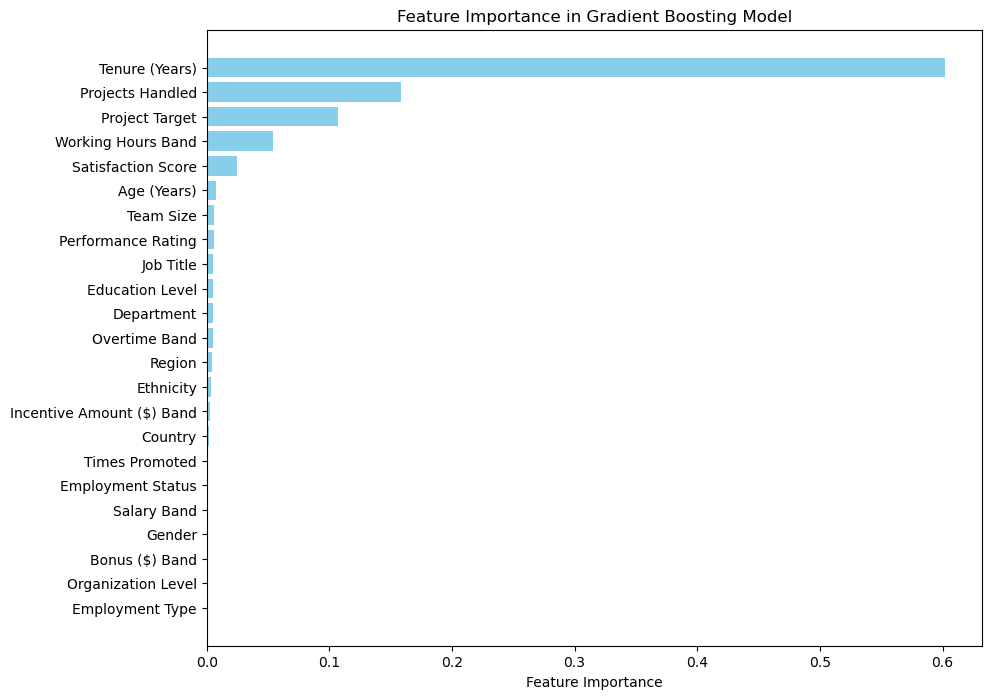

In [66]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()

In [67]:
import joblib

# Save the model
joblib.dump(best_model, 'gradient_boosting_model.pkl')

# Load the model (when needed)
loaded_model = joblib.load('gradient_boosting_model.pkl')

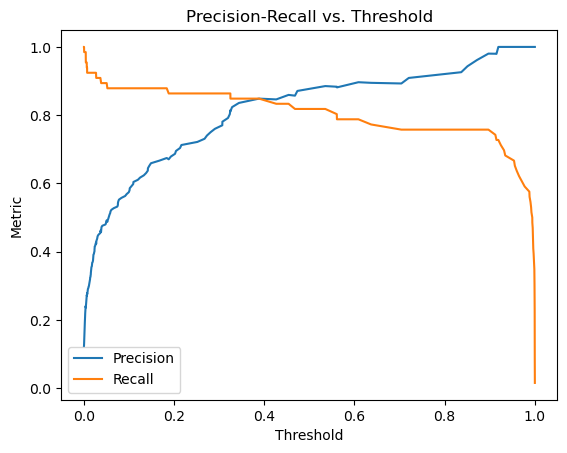

In [69]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Metric")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import f1_score

f1_scores = [f1_score(y_test, (y_prob >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)


Best Threshold: 0.8969940306984256


In [71]:
y_pred_custom = (y_prob >= best_threshold).astype(int)
print("\nClassification Report with Custom Threshold:\n", classification_report(y_test, y_pred_custom))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       474
           1       0.98      0.76      0.85        66

    accuracy                           0.97       540
   macro avg       0.97      0.88      0.92       540
weighted avg       0.97      0.97      0.97       540

ROC-AUC Score: 0.9521480629075566


In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
       'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
       'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 'Tenure Band', 
       'Performance Review Year', 'Potential Rating', 'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
       'Projects Handled Band', 'Project Target Band', 'Working Hours',
       'Overtime'], axis=1, inplace=True)
# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

df

,Gender,Education Level,Department,Job Title,Organization Level,Region,Country,Employment Status,Employment Type,Times Promoted,Current Employment Status,Ethnicity,Tenure (Years),Age (Years),Salary Band,Performance Rating,Projects Handled,Project Target,Team Size,Satisfaction Score,Incentive Amount ($) Band,Bonus ($) Band,Working Hours Band,Overtime Band
0,Female,Associate's,IT,IT Support Specialist,Entry,Asia,Bangladesh,Remote,Full-time,3,Active,BD-Tribal,3,37,75K-100K,2,32,33,15,3,5K-10K,5K-10K,1901-2100,151-200
1,Male,Associate's,IT,Software Engineer,Operational,North America,USA,Remote,Part-time,4,Active,White,4,22,125K-150K,2,40,46,9,4,500-5K,5K-10K,1701-1900,Above 200
2,Female,Bachelor's,R&D,Research Scientist,Mid-Level,Europe,Germany,Onsite,Full-time,1,Active,Germany-Other,6,60,50K-75K,3,63,73,11,4,5K-10K,10K-20K,1701-1900,101-150
3,Female,Master's,Sales,Sales Representative,Entry,Europe,UK,Onsite,Full-time,2,Active,White British,3,48,75K-100K,2,32,35,12,4,500-5K,500-5K,1701-1900,0-50
4,Female,Doctorate,IT,IT Support Specialist,Entry,Asia,Bangladesh,Remote,Full-time,3,Active,Bengali,5,37,125K-150K,2,53,62,14,4,5K-10K,5K-10K,1901-2100,101-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Female,High School,Marketing,Marketing Coordinator,Entry,Europe,Germany,Onsite,Full-time,1,Active,German,5,43,50K-75K,3,53,61,7,4,5K-10K,10K-20K,1701-1900,101-150
1796,Male,Associate's,Sales,Sales Representative,Entry,Europe,UK,Remote,Full-time,1,Resigned,White British,1,18,75K-100K,2,20,27,15,5,500-5K,500-5K,1501-1700,51-100
1797,Female,Master's,Finance,Financial Analyst,Operational,Asia,India,Remote,Full-time,0,Resigned,Indo-Aryan,2,53,75K-100K,2,57,67,12,2,500-5K,5K-10K,1701-1900,101-150
1798,Other,Associate's,Sales,Account Executive,Operational,Europe,UK,Onsite,Full-time,1,Active,White British,3,39,100K-125K,3,30,37,12,4,5K-10K,5K-10K,1901-2100,Above 200


In [98]:

# Encode categorical variables
for col in ['Gender', 'Education Level', 'Department', 'Job Title', 'Organization Level',
            'Region', 'Country', 'Employment Status', 'Employment Type',
            'Current Employment Status', 'Ethnicity', 'Salary Band',
            'Incentive Amount ($) Band', 'Bonus ($) Band', 'Working Hours Band', 
            'Overtime Band']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize only numerical columns (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Initialize GradientBoostingClassifier with hyperparameters
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=1
)

# Train the model
gbc.fit(X_train, y_train)

# Predict labels and probabilities for the test set only
y_predict = gbc.predict(X_test)
y_prob = gbc.predict_proba(X_test)[:, 1]

# Evaluate model performance on the test set
print("Accuracy:", accuracy_score(y_test, y_predict))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Add Predict and Probability columns to a copy of the test DataFrame for analysis (optional)
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predict'] = y_predict
test_results['Probability'] = y_prob

# Display updated test results DataFrame (optional)
print(test_results.head())
test_results

Accuracy: 0.9722222222222222
AUC-ROC: 0.9628564122235009
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       474
           1       0.93      0.83      0.88        66

    accuracy                           0.97       540
   macro avg       0.95      0.91      0.93       540
weighted avg       0.97      0.97      0.97       540

        Gender  Education Level  Department  Job Title  Organization Level  \
1462 -0.966532         1.405162     1.44152   1.012495           -1.184759   
510   0.783225         0.705634     0.93017   0.356810           -0.106928   
612  -0.966532         0.705634     0.93017   0.575372           -0.106928   
1322 -0.966532         0.006107     0.41882  -0.298874           -0.106928   
993   0.783225         1.405162    -0.60388   1.231056            0.970903   

        Region   Country  Employment Status  Employment Type  Times Promoted  \
1462  0.261544 -0.706266           1.016001

,Gender,Education Level,Department,Job Title,Organization Level,Region,Country,Employment Status,Employment Type,Times Promoted,Ethnicity,Tenure (Years),Age (Years),Salary Band,Performance Rating,Projects Handled,Project Target,Team Size,Satisfaction Score,Incentive Amount ($) Band,Bonus ($) Band,Working Hours Band,Overtime Band,Actual,Predict,Probability
1462,-0.966532,1.405162,1.441520,1.012495,-1.184759,0.261544,-0.706266,1.016001,2.066874,0.086476,-0.374281,-0.974757,-1.661889,1.076860,3,-1.387506,-1.244620,11,5,-0.209589,0.262015,-0.988523,1.949545,0,0,0.039936
510,0.783225,0.705634,0.930170,0.356810,-0.106928,0.261544,0.710765,1.016001,-0.483823,-1.337828,-1.572743,-0.974757,0.748931,1.076860,2,-1.328207,-1.346844,4,3,-0.209589,0.262015,0.499576,0.984348,0,0,0.007808
612,-0.966532,0.705634,0.930170,0.575372,-0.106928,1.612139,1.419281,-0.984251,-0.483823,-0.625676,0.025206,-0.365836,0.895042,1.076860,3,-0.616617,-0.733499,10,4,0.754215,0.992412,0.499576,-0.946046,0,0,0.003825
1322,-0.966532,0.006107,0.418820,-0.298874,-0.106928,1.612139,1.419281,1.016001,-0.483823,0.798627,1.223667,-2.192598,0.310600,-2.240607,3,1.992546,2.282114,15,3,-1.173393,-1.198778,0.499576,-0.946046,1,1,0.996183
993,0.783225,1.405162,-0.603880,1.231056,0.970903,-1.089051,-1.414782,-0.984251,2.066874,0.798627,-1.173256,1.460927,-0.785227,-2.240607,3,1.162358,1.004312,7,5,0.754215,-1.198778,0.499576,0.019151,0,0,0.002411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0.783225,0.006107,-0.603880,1.231056,0.970903,-1.089051,0.002249,-0.984251,-0.483823,0.798627,0.424693,-0.974757,0.091435,0.247494,4,-1.268908,-1.244620,11,5,0.754215,0.992412,0.499576,-0.946046,0,0,0.005279
1179,-0.966532,1.405162,-1.626581,-1.173120,0.970903,1.612139,1.419281,1.016001,2.066874,0.798627,1.223667,-2.192598,-0.493006,1.076860,4,2.111144,1.975441,9,4,-1.173393,-1.198778,0.499576,1.949545,1,1,0.995996
401,0.783225,-1.392948,0.418820,0.138249,-1.184759,0.261544,0.710765,-0.984251,2.066874,-1.337828,1.423411,-0.365836,1.552538,0.247494,4,-0.616617,-0.733499,11,5,0.754215,-1.198778,0.499576,-0.946046,0,0,0.001889
154,0.783225,-1.392948,0.418820,0.138249,-1.184759,-1.089051,0.002249,1.016001,-0.483823,-1.337828,0.424693,-0.974757,0.018380,0.247494,2,-1.268908,-1.295732,16,3,-0.209589,0.262015,-2.476622,0.019151,0,0,0.088979


In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [96]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gbc, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.98412698 0.96428571 0.96428571 0.97222222 0.96031746]
Mean CV accuracy: 0.9690476190476189


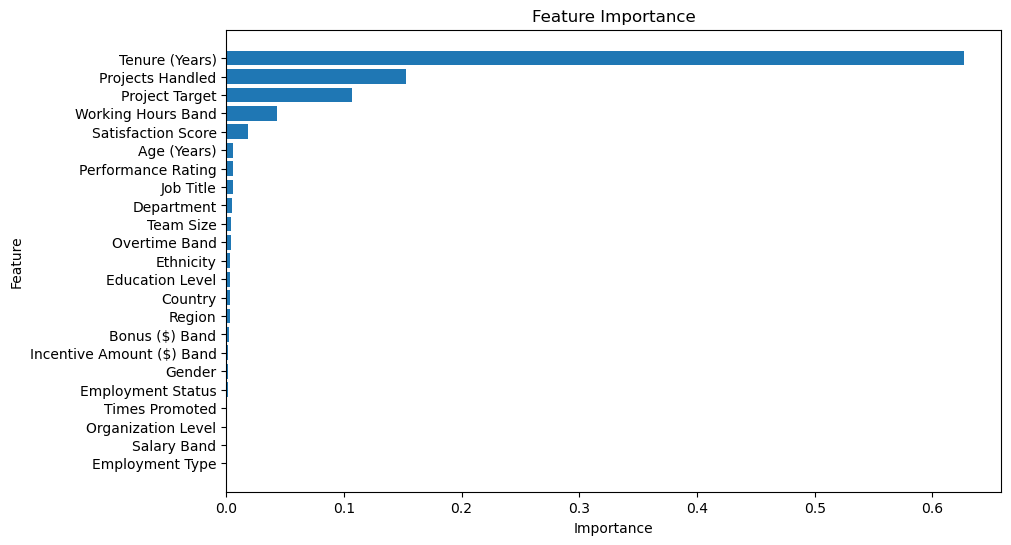

In [97]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = gbc.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


   Gender  Education Level  Department  Job Title  Organization Level  Region  \
0       0                0           2          7                   0       0   
1       1                0           2         15                   2       2   
2       0                1           5         12                   1       1   
3       0                4           6         14                   0       1   
4       0                2           2          7                   0       0   

   Country  Employment Status  Employment Type  Times Promoted  Ethnicity  \
0        0                  1                0               3          2   
1        4                  1                1               4         15   
2        1                  0                0               1          8   
3        3                  0                0               2         16   
4        0                  1                0               3          3   

   Tenure (Years)  Age (Years)  Salary Band  Perfo

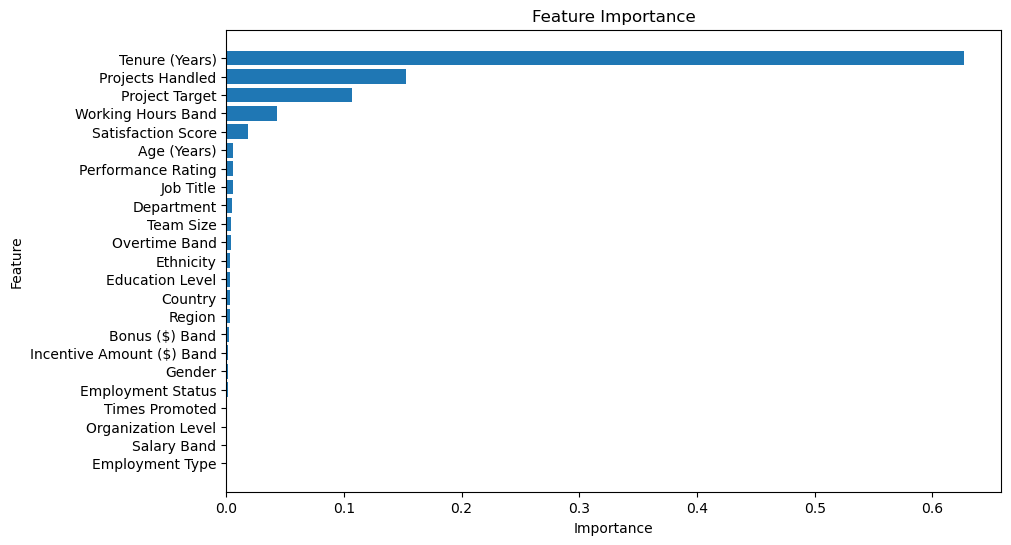

In [101]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Retain Employee ID for later use and drop irrelevant columns
employee_ids = df['Employee ID']  # Save Employee ID separately
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
         'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
         'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 
         'Tenure Band', 'Performance Review Year', 'Potential Rating',
         'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
         'Projects Handled Band', 'Project Target Band', 'Working Hours',
         'Overtime'], axis=1, inplace=True)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Department', 'Job Title', 
                    'Organization Level', 'Region', 'Country', 
                    'Employment Status', 'Employment Type',
                    'Current Employment Status', 'Ethnicity', 
                    'Salary Band', 'Incentive Amount ($) Band',
                    'Bonus ($) Band', 'Working Hours Band', 
                    'Overtime Band']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target variable
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize numerical columns only (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Initialize GradientBoostingClassifier with default hyperparameters
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=1
)

# Train the model on the training set
gbc.fit(X_train, y_train)

# Predict labels and probabilities for all employees (entire dataset)
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']
all_predictions = gbc.predict(X)
all_probabilities = gbc.predict_proba(X)[:, 1]

# Create a DataFrame with all results (for Power BI visualization)
all_results = X.copy()
all_results['Employee ID'] = employee_ids  # Add Employee ID back to results
all_results['Actual'] = y.values  # Actual labels
all_results['Predict'] = all_predictions  # Predicted labels
all_results['Probability'] = all_probabilities  # Predicted probabilities

# Evaluate model performance on the test set only (optional)
y_predict_test = gbc.predict(X_test)
y_prob_test = gbc.predict_proba(X_test)[:, 1]

# Hyperparameter Tuning with GridSearchCV (optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)



# Cross-validation scores for the default model (optional)
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5)


In [102]:
unique, counts = np.unique(all_predictions, return_counts=True)
print("Prediction Distribution:", dict(zip(unique, counts)))

Prediction Distribution: {1: 1800}


In [128]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Retain Employee ID for later use and drop irrelevant columns
employee_ids = df['Employee ID']  # Save Employee ID separately
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
         'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
         'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 
         'Tenure Band', 'Performance Review Year', 'Potential Rating',
         'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
         'Projects Handled Band', 'Project Target Band', 'Working Hours',
         'Overtime'], axis=1, inplace=True)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Department', 'Job Title', 
                    'Organization Level', 'Region', 'Country', 
                    'Employment Status', 'Employment Type',
                    'Current Employment Status', 'Ethnicity', 
                    'Salary Band', 'Incentive Amount ($) Band',
                    'Bonus ($) Band', 'Working Hours Band', 
                    'Overtime Band']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target variable
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize numerical columns only (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Gradient Boosting Classifier on balanced data
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=1
)
gbc.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for all employees (entire dataset)
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']
all_probabilities = gbc.predict_proba(X)[:, 1]  # Probabilities for class 1 (Resigned)

# Adjust threshold based on precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, all_probabilities)
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Optimal threshold

# Predict using adjusted threshold
all_predictions_adjusted = (all_probabilities >= optimal_threshold).astype(int)

# Create a DataFrame with all results (for Power BI visualization)
all_results = X.copy()
all_results['Employee ID'] = employee_ids  # Add Employee ID back to results
all_results['Actual'] = y.values  # Actual labels
all_results['Predict_Adjusted'] = all_predictions_adjusted  # Adjusted predictions

print("Shape of all_results DataFrame:", all_results.shape)

Shape of all_results DataFrame: (1800, 26)


Adjusted Prediction Distribution: {0: 1710, 1: 90}
Custom Threshold Prediction Distribution: {0: 1561, 1: 239}
Misclassified Resigned Employees:
       Gender  Education Level  Department  Job Title  Organization Level  \
5          0                2           2          3                   1   
13         1                3           5         12                   1   
14         0                2           5         11                   1   
19         2                4           2          7                   0   
38         0                3           5         12                   1   
...      ...              ...         ...        ...                 ...   
1748       1                0           5         12                   1   
1773       1                4           6         14                   0   
1785       0                3           1          6                   2   
1796       1                0           6         14                   0   
1797       0      

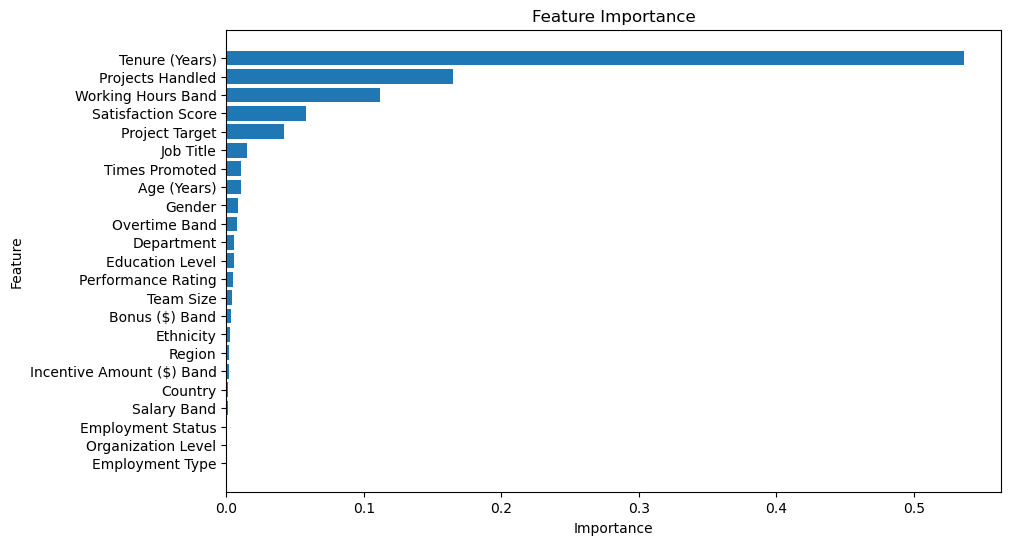

In [129]:

# Save results to CSV for Power BI visualization
all_results.to_csv('model_predictions_all_employees_adjusted.csv', index=False)

# Check prediction distribution after threshold adjustment
unique, counts = np.unique(all_predictions_adjusted, return_counts=True)
print("Adjusted Prediction Distribution:", dict(zip(unique, counts)))

# Experiment with a custom threshold (e.g., 0.467)
custom_threshold = 0.467
all_predictions_custom = (all_probabilities >= custom_threshold).astype(int)
unique_custom, counts_custom = np.unique(all_predictions_custom, return_counts=True)
print("Custom Threshold Prediction Distribution:", dict(zip(unique_custom, counts_custom)))

# Analyze misclassified instances (Actual Resigned but Predicted Active)
misclassified_resigned = all_results[(all_results['Actual'] == 1) & (all_results['Predict_Adjusted'] == 0)]
print("Misclassified Resigned Employees:\n", misclassified_resigned)

# Feature Importance Analysis and Visualization
feature_importances = gbc.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [130]:
# Debugging: Check the shape of the dataset
print("Original Dataset Shape:", df.shape)

# Step 1: Ensure all rows are present in features and targets
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

# Debugging: Ensure no rows are dropped when saving Employee IDs
print("Shape of Employee IDs:", employee_ids.shape)

# Step 2: Predict probabilities for all employees
all_probabilities = gbc.predict_proba(X)[:, 1]  # Probabilities for class 1 (Resigned)

# Debugging: Ensure the probabilities match the dataset
print("Shape of Predicted Probabilities:", all_probabilities.shape)

# Step 3: Adjust threshold for predictions
precision, recall, thresholds = precision_recall_curve(y, all_probabilities)
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Optimal threshold

# Debugging: Check optimal threshold
print("Optimal Threshold:", optimal_threshold)

# Predict using adjusted threshold
all_predictions_adjusted = (all_probabilities >= optimal_threshold).astype(int)

# Debugging: Check prediction distribution
unique_adjusted, counts_adjusted = np.unique(all_predictions_adjusted, return_counts=True)
print("Adjusted Prediction Distribution:", dict(zip(unique_adjusted, counts_adjusted)))

# Step 4: Create the final results DataFrame
all_results = X.copy()
all_results['Employee ID'] = employee_ids  # Add Employee ID back
all_results['Actual'] = y.values  # Actual labels
all_results['Predict_Adjusted'] = all_predictions_adjusted  # Adjusted predictions

# Debugging: Check the shape of the final DataFrame
print("Shape of Final Results DataFrame:", all_results.shape)

# Step 5: Save the results to a CSV file
output_file = 'model_predictions_all_employees_adjusted.csv'
all_results.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

# Debugging: Check misclassified instances
misclassified_resigned = all_results[(all_results['Actual'] == 1) & (all_results['Predict_Adjusted'] == 0)]
print("Misclassified Resigned Employees:\n", misclassified_resigned)

# Additional: Check for custom threshold (if needed)
custom_threshold = 0.467
all_predictions_custom = (all_probabilities >= custom_threshold).astype(int)
unique_custom, counts_custom = np.unique(all_predictions_custom, return_counts=True)
print("Custom Threshold Prediction Distribution:", dict(zip(unique_custom, counts_custom)))

# Debugging: Verify saved file content matches expectations
saved_data = pd.read_csv(output_file)
print("Shape of Saved Data:", saved_data.shape)


Original Dataset Shape: (1800, 24)
Shape of Features (X): (1800, 23)
Shape of Target (y): (1800,)
Shape of Employee IDs: (1800,)
Shape of Predicted Probabilities: (1800,)
Optimal Threshold: 0.8158471765603637
Adjusted Prediction Distribution: {0: 1710, 1: 90}
Shape of Final Results DataFrame: (1800, 26)
Results saved to model_predictions_all_employees_adjusted.csv
Misclassified Resigned Employees:
       Gender  Education Level  Department  Job Title  Organization Level  \
5          0                2           2          3                   1   
13         1                3           5         12                   1   
14         0                2           5         11                   1   
19         2                4           2          7                   0   
38         0                3           5         12                   1   
...      ...              ...         ...        ...                 ...   
1748       1                0           5         12              

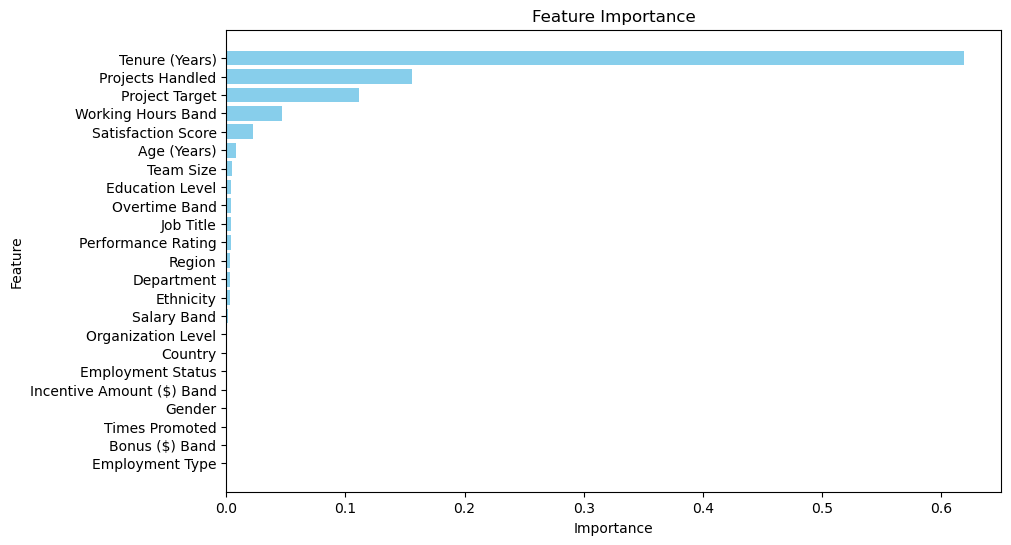

               Feature  Importance
11      Tenure (Years)    0.619232
15    Projects Handled    0.156143
16      Project Target    0.111369
21  Working Hours Band    0.047080
18  Satisfaction Score    0.022091
12         Age (Years)    0.007963
17           Team Size    0.004952
1      Education Level    0.004262
22       Overtime Band    0.004258
3            Job Title    0.003750


In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Random Forest/XGBoost model and 'X' is the feature DataFrame
feature_importance = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Display top 10 features
print(importance_df.head(10))


Index(['Gender', 'Education Level', 'Department', 'Job Title',
       'Organization Level', 'Region', 'Country', 'Employment Status',
       'Employment Type', 'Times Promoted', 'Ethnicity', 'Tenure (Years)',
       'Age (Years)', 'Salary Band', 'Performance Rating', 'Projects Handled',
       'Project Target', 'Team Size', 'Satisfaction Score',
       'Incentive Amount ($) Band', 'Bonus ($) Band', 'Working Hours Band',
       'Overtime Band', 'Employee ID', 'Actual', 'Predict_Adjusted'],
      dtype='object')


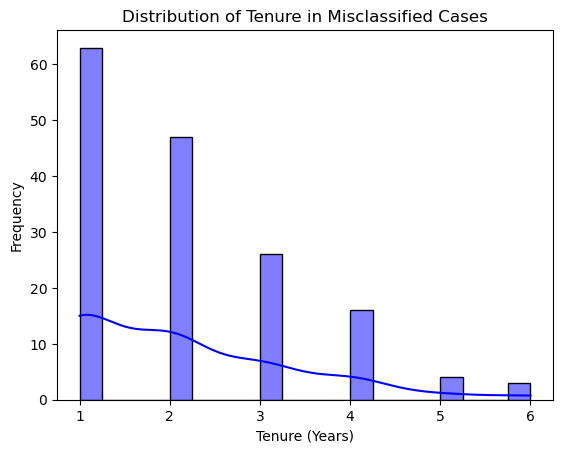

In [134]:
import pandas as pd

# Load the results file
results = pd.read_csv("model_predictions_all_employees_adjusted.csv")

# Ensure the file contains the necessary columns
print(results.columns)

# Filter misclassified cases
misclassified = results[(results['Actual'] != results['Predict_Adjusted'])]

# Distribution of tenure in misclassified cases
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(misclassified['Tenure (Years)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Tenure in Misclassified Cases')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()


In [135]:
# Filter misclassified cases
misclassified = results[(results['Actual'] != results['Predict_Adjusted'])]

# Confirm the shape of the misclassified dataset
print("Shape of Misclassified Cases:", misclassified.shape)


Shape of Misclassified Cases: (159, 26)


In [138]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Retain Employee ID for later use and drop irrelevant columns
employee_ids = df['Employee ID']  # Save Employee ID separately
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
         'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
         'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 
         'Tenure Band', 'Performance Review Year', 'Potential Rating',
         'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
         'Projects Handled Band', 'Project Target Band', 'Working Hours',
         'Overtime'], axis=1, inplace=True)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Department', 'Job Title', 
                    'Organization Level', 'Region', 'Country', 
                    'Employment Status', 'Employment Type',
                    'Current Employment Status', 'Ethnicity', 
                    'Salary Band', 'Incentive Amount ($) Band',
                    'Bonus ($) Band', 'Working Hours Band', 
                    'Overtime Band']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target variable
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize numerical columns only (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Gradient Boosting Classifier on balanced data
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=1
)
gbc.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for all employees (entire dataset)
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']
all_probabilities = gbc.predict_proba(X)[:, 1]  # Probabilities for class 1 (Resigned)

# Adjust threshold based on precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, all_probabilities)
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Optimal threshold

# Predict using adjusted threshold
all_predictions_adjusted = (all_probabilities >= optimal_threshold).astype(int)

# Create a DataFrame with all results (for Power BI visualization)
all_results = pd.DataFrame({
    "Employee ID": employee_ids,
    "Actual": y.values,
    "Prediction": all_predictions_adjusted,
    "Probability": all_probabilities,
})

# Save results to CSV for Power BI visualization
all_results.to_csv('1model_predictions_all_employees.csv', index=False)

print("Results saved to model_predictions_all_employees.csv")


Results saved to model_predictions_all_employees.csv


In [139]:
# Add interaction terms
df['Tenure_Satisfaction'] = df['Tenure (Years)'] * df['Satisfaction Score']
df['Workload_Balance'] = df['Projects Handled'] / df['Working Hours Band']

# Train Gradient Boosting Classifier with adjusted data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
gbc.fit(X_train_balanced, y_train_balanced)

# Predict probabilities and adjust threshold
all_probabilities = gbc.predict_proba(X)[:, 1]
custom_threshold = optimal_threshold * 0.9
all_predictions_custom = (all_probabilities >= custom_threshold).astype(int)

# Save results for Power BI
all_results['Prediction_Custom'] = all_predictions_custom
all_results.to_csv('2model_predictions_adjusted.csv', index=False)

In [141]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Retain Employee ID for later use and drop irrelevant columns
employee_ids = df['Employee ID']  # Save Employee ID separately
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
         'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
         'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 
         'Tenure Band', 'Performance Review Year', 'Potential Rating',
         'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
         'Projects Handled Band', 'Project Target Band', 'Working Hours',
         'Overtime'], axis=1, inplace=True)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Department', 'Job Title', 
                    'Organization Level', 'Region', 'Country', 
                    'Employment Status', 'Employment Type',
                    'Current Employment Status', 'Ethnicity', 
                    'Salary Band', 'Incentive Amount ($) Band',
                    'Bonus ($) Band', 'Working Hours Band', 
                    'Overtime Band']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target variable
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, shuffle=True, random_state=1
    )
    
    # Standardize numerical columns only (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Gradient Boosting Classifier on balanced data
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=1
)
gbc.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for all employees (entire dataset)
X = df.drop('Current Employment Status', axis=1)
y = df['Current Employment Status']
probabilities = gbc.predict_proba(X)[:, 1]  # Probabilities for class 1 (Resigned)

# Adjust threshold based on precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probabilities)
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Optimal threshold

# Predict using adjusted threshold
predictions_adjusted = (probabilities >= optimal_threshold).astype(int)

# Create a DataFrame with all results (for Power BI visualization)
results_df = pd.DataFrame({
    "Employee ID": employee_ids,
    "Actual": y.values,
    "Prediction": predictions_adjusted,
    "Probability": probabilities,
})

# Save results to CSV for Power BI visualization
results_df.to_csv('3model_predictions_all_employees.csv', index=False)

print("Results saved to model_predictions_all_employees.csv")


Results saved to model_predictions_all_employees.csv


In [125]:
custom_threshold = 0.467
all_predictions_custom = (all_probabilities >= custom_threshold).astype(int)
unique, counts = np.unique(all_predictions_custom, return_counts=True)
print("Custom Threshold Prediction Distribution:", dict(zip(unique, counts)))


Custom Threshold Prediction Distribution: {0: 1561, 1: 239}


In [126]:
misclassified = all_results[(all_results['Actual'] == 1) & (all_results['Predict_Adjusted'] == 0)]
print("Misclassified Resigned Employees:\n", misclassified)


Misclassified Resigned Employees:
       Gender  Education Level  Department  Job Title  Organization Level  \
5          0                2           2          3                   1   
13         1                3           5         12                   1   
14         0                2           5         11                   1   
19         2                4           2          7                   0   
38         0                3           5         12                   1   
...      ...              ...         ...        ...                 ...   
1748       1                0           5         12                   1   
1773       1                4           6         14                   0   
1785       0                3           1          6                   2   
1796       1                0           6         14                   0   
1797       0                4           0          4                   2   

      Region  Country  Employment Status  Employment

In [107]:
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [108]:
from sklearn.metrics import classification_report

print(classification_report(y, all_predictions_adjusted))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1561
           1       1.00      0.27      0.43       239

    accuracy                           0.90      1800
   macro avg       0.95      0.64      0.69      1800
weighted avg       0.91      0.90      0.88      1800



In [112]:
misclassified = all_results[(all_results['Actual'] == 1) & (all_results['Predict_Adjusted'] == 0)]
print(misclassified)


      Gender  Education Level  Department  Job Title  Organization Level  \
5          0                2           2          3                   1   
13         1                3           5         12                   1   
14         0                2           5         11                   1   
19         2                4           2          7                   0   
38         0                3           5         12                   1   
...      ...              ...         ...        ...                 ...   
1748       1                0           5         12                   1   
1773       1                4           6         14                   0   
1785       0                3           1          6                   2   
1796       1                0           6         14                   0   
1797       0                4           0          4                   2   

      Region  Country  Employment Status  Employment Type  Times Promoted  \
5         